<div style='background-color:  #fffbe6; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid red;'>
    <h1 style='text-align: center; margin: 0; color: red;'>ÁP DỤNG GIẢI THUẬT GENETIC ALGORITHM VÀO BÀI TOÁN DỰ ĐOÁN DOANH THU BÁN HÀNG (SALE) DỰA VÀO CÁC KÊNH MARKETING</h1>
</div>



<div style='background-color: #e6f7fb; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid #1890ff;'>    
    <p>
        <h2  style='text-align: center; margin: 0; color: red;'>CÀI ĐẶT CÁC CẤU TRÚC TRỪU TƯỢNG VÀ CHƯƠNG TRÌNH GIẢI THUẬT GA</h2>
    </p>
</div>


Best loss: 0.0770358252405909 with gen:  [0.09136424862704884, 0.39467010768206023, 0.5448924440112562, 0.6642231768303325]
Best loss: 0.02309371841276134 with gen:  [0.09136424862704884, 0.39467010768206023, 0.16066992939178515, 0.6642231768303325]
Best loss: 0.017867282961379623 with gen:  [0.09136424862704884, 0.39467010768206023, 0.16066992939178515, 0.39865864050762984]
Best loss: 0.008409605388759152 with gen:  [0.09136424862704884, 0.6426540123657422, 0.16066992939178515, 0.30795728139132283]
Best loss: 0.01017541939841103 with gen:  [0.25677945649684364, 0.39467010768206023, 0.16066992939178515, -0.06337319565432076]
Best loss: 0.006325076262374725 with gen:  [0.08225590509428918, 0.5859475757338619, 0.36521020153935085, -0.03478274015532082]
Best loss: 0.005424971645786246 with gen:  [0.09136424862704884, 0.6203981374982206, 0.16066992939178515, 0.19236308993304385]
Best loss: 0.005354557300320933 with gen:  [0.09136424862704884, 0.6203981374982206, 0.16066992939178515, 0.1305

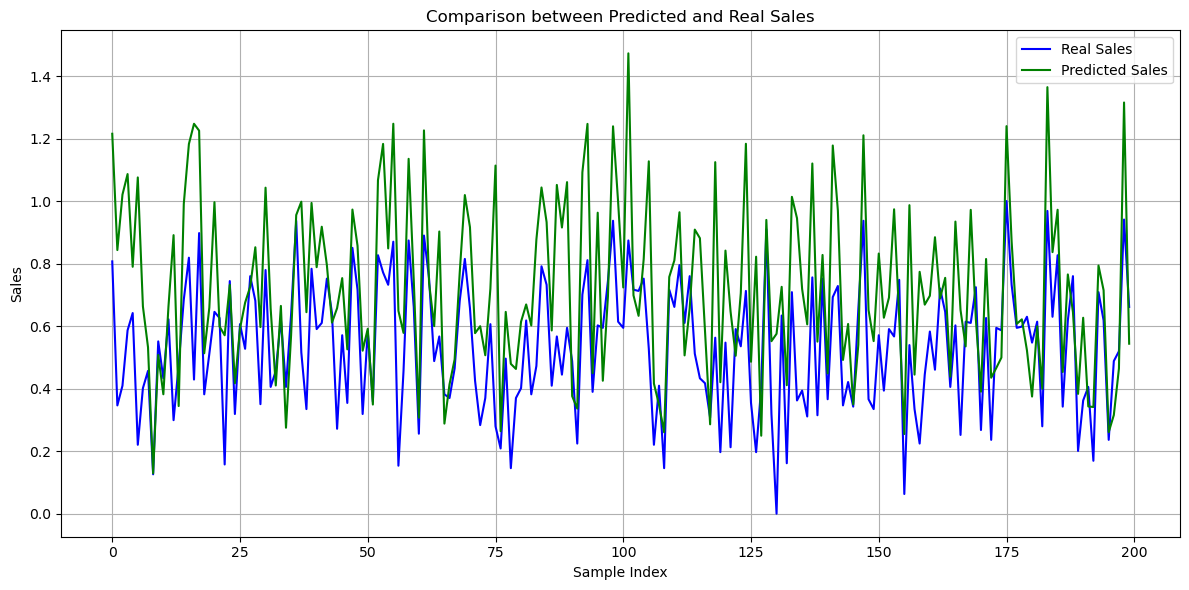

In [3]:
### Đọc file data lên
import numpy as np
import matplotlib.pyplot as plt
import random 

def normalize_data(X_data):
    X_data_c = X_data
    #mean = np.mean(X_data_c, axis = 0); # axis = 0: Tính theo cột - mỗi cột là một đặc trưng (feature) của dữ liệu.
    #max_data = np.max(X_data_c, axis = 0);
    #min_data = np.min(X_data_c, axis = 0);
    max_data = np.max(X_data_c, axis = 0)
    min_data = np.min(X_data_c, axis = 0)
    X_data_normalize = (X_data_c - min_data) / (max_data - min_data + 1e-6 )
    return X_data_normalize, min_data, max_data


def get_data(file_can_doc):
    data = np.genfromtxt(file_can_doc, delimiter = ',', skip_header = 1);
    X_data = data[:, :3]
    y_data = data[:, 3]

    #Chuẩn hóa dữ liệu 
    X_data, _, _  = normalize_data(X_data)
    y_data, min_y, max_y = normalize_data(y_data)
    #Thêm hệ số b (bias) vào dữ liệu X_data
    X_b = np.c_[np.ones((X_data.shape[0],1)), X_data]


    return X_b, y_data, min_y, max_y

### Cài đặc hàm tạo cá thể

def get_population(bound, n, m):
    population = []
    for _ in range(m):
        gen = [(random.random()*2 - 1) * (bound / 2) for _ in range(n)]
        population.append(gen)
    return population

### Cài đặt hàm đổ lỗi

def compute_loss(X_b, y_data, individual):
    theta = np.array(individual);
    y_hat = X_b.dot(theta.T);
    current_sum =  sum((y_hat - y_data) ** 2);
    loss = current_sum / (X_b.shape[0])
    return loss

### Cài đặt hàm tính fitness (sức sống của mỗi cá thể trong quần thể)

def compute_fitness(X_b, y_data, individual):
    loss = compute_loss(X_b, y_data, individual);
    fitness = 1 / (loss + 1e-6);
    return fitness



def selection(size_of_population, population):
    index_1 = np.random.randint(0, size_of_population - 1);
    index_2 = np.random.randint(0, size_of_population - 1);

    while index_1 == index_2:
        index_2 = np.random.randint(0, size_of_population - 1);
        
    parent = population[index_1]
    if index_2 > index_1:
        parent = population[index_2]

    return parent;

def roulette_wheel_selection(old_population, X_b, y_data):
    fitness = 0;
    fitness_value = []
    n = len(old_population)
    current_sum = 0;
    
    for x in old_population:
            fitness = compute_fitness(X_b, y_data, x)
            fitness_value.append(fitness)

    for x in fitness_value:
        current_sum += x;

    probability = [f / current_sum for f in fitness_value]
    temp = 0
    probability_sum = [] # mảng xác suất cộng dồn ứng với từng phần tử
    for x in probability:
        temp += x;
        probability_sum.append(temp)

    idx_selection_population = []
    for _ in range(0, n):
        res = random.random()
        for i, x in enumerate(probability_sum):
            if (res <= x):
                idx_selection_population.append(i)
                break

    selection_population = []
    for x in idx_selection_population:
        selection_population.append(old_population[x])

    return selection_population
    
    


### Hàm trao đổi chéo (crossover)

def crossover(individual1, individual2, crossover_rate):
    n = len(individual1);
    child_1 = individual1.copy();
    child_2 = individual2.copy();
    for i in range(0, n):
        if (random.random() < crossover_rate):
            child_1[i] = individual2[i];
            child_2[i] = individual1[i];

    return child_1, child_2

### Hàm tạo đột biến (mutation)
def gioi_thieu_gen_moi(bound):
    gen = (random.random()*2 - 1) * (bound / 2);
    return gen
    
def mutate(child, mutation_rate, bound):
    child_c = child.copy()
    n = len(child_c)
    for i in range(n):
        if random.random() < mutation_rate:
            noise = np.random.normal(0, 0.1 * bound) ## Cộng thêm nhiễu Gaussian nhẹ để không phá vỡ cá thể tốt
            #child_c[i] = gioi_thieu_gen_moi(bound);
            child_c[i] += noise
    return child_c

def create_new_population(X_b, y_data, old_population, crossover_rate, mutation_rate, elitism, gen, losses):
    m = len(old_population)
    sorted_population = sorted(old_population, key = lambda ind: compute_fitness(X_b, y_data, ind));
 
    
    if gen % 1 == 0:
        print("Best loss:", compute_loss(X_b, y_data, sorted_population[-1]), "with gen: ", sorted_population[-1])
    losses.append(compute_loss(X_b, y_data, sorted_population[-1]))
                     
    new_generation = old_population[-elitism:]
    while len(new_generation) < len(old_population):
        ## Selection
        parent_1 = selection(m, sorted_population)
        parent_2 = selection(m, sorted_population)

        # Crossover
        child_1, child_2 = crossover(parent_1, parent_2, crossover_rate)

        # Mutation
        child1_mutation = mutate(child_1, mutation_rate, bound);
        child2_mutation = mutate(child_2, mutation_rate, bound);

        new_generation.append(child1_mutation)
        new_generation.append(child2_mutation)


    return new_generation

def genetic_althorigm(population, X_b, y_data, crossover_rate, mutation_rate, elitism, gen, loss_threshold):
    m = len(population)
    n = len(population[0])
    losses = []
    old_population = population
    
    n_generation = 3000;
    for i in range(n_generation):
        selection_population = roulette_wheel_selection(old_population, X_b, y_data)
        new_generation = create_new_population(X_b, y_data, selection_population, crossover_rate, mutation_rate, elitism, gen, losses)
        old_population = new_generation
        
        # Tính loss cá thể tốt nhất hiện tại
        best_individual = max(old_population, key=lambda ind: compute_fitness(X_b, y_data, ind))
        best_loss = compute_loss(X_b, y_data, best_individual)
        
        # Dừng sớm nếu loss nhỏ hơn ngưỡng
        if best_loss < loss_threshold:
            print(f"Early stopping at generation {i} with loss {best_loss}")
            break
            
    res = sorted(old_population, key = lambda ind: compute_fitness(X_b, y_data, ind));
    return res[-1], losses

def visualize_predict_gt():
    # Sắp xếp quần thể theo fitness tăng dần (loss giảm dần)
    sorted_population = sorted(population, key=lambda ind: compute_fitness(features_X, sales_Y, ind))
    best_individual = sorted_population[-1]
    print("Best individual:", best_individual)

    theta = np.array(best_individual)

    # Tính dự đoán trên tập đặc trưng
    y_pred_norm = np.dot(features_X, theta)

    # Giải chuẩn hóa cả y_pred và y_true
    #y_pred = y_pred_norm * (max_y - min_y + 1e-6) + min_y
    

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))
    plt.plot(sales_Y, label='Real Sales', color='blue')
    plt.plot(y_pred_norm, label='Predicted Sales', color='green')
    plt.xlabel('Sample Index')
    plt.ylabel('Sales')
    plt.title('Comparison between Predicted and Real Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



if __name__ == "__main__":
    bound = 5;
    size_of_individual = 4;
    size_of_population = 350;
    elitism = 3;
    gen = 1;
    crossover_rate = 0.9 
    mutation_rate = 0.3
    loss_threshold = 0.003

    features_X, sales_Y, min_y, max_y  = get_data("advertising.csv") # dùng cho visualize
    population = get_population(bound, size_of_individual, size_of_population)

    theta, losses = genetic_althorigm(population, features_X, sales_Y,
                                      crossover_rate, mutation_rate, elitism,
                                      gen, loss_threshold)
    print("Final theta:", theta)

    visualize_predict_gt()  # trực quan hóa kết quả



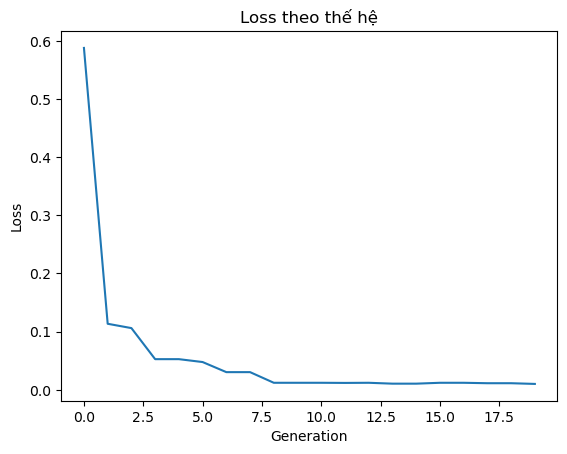

In [97]:
plt.plot(losses)
plt.xlabel("Generation")
plt.ylabel("Loss")
plt.title("Loss theo thế hệ")
plt.show()
